<a href="https://colab.research.google.com/github/bhagyashridhavale/Mobile-price-prediction-classification/blob/main/Mobile_price_prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



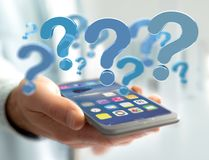

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name(Self) -**    - Bhagyashri Ramesh Dhavale

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone (eg - RAM,Internal Memory, etc) and its selling price in this problem, we do not have to predict the actual price but a price range indicating how high the price is?**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification project/data_mobile_price_range.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='BuPu')

In [ ]:
# looking how many values are missing.

def missing_zero_values_table(df):
  zero_val = (df == 0.00).astype(int).sum(axis=0)
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * df.isnull().sum()/len(df)
  mz_table = pd.concat([zero_val,mis_val,mis_val_percent],axis=1)
  mz_table = mz_table.rename(
  columns = {0 : 'Zero Values' , 1 : 'Missing Values' , 2 : '% of Total Values'})
  mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
  mz_table['% Total Zero Missing Values'] = 100 * mz_table["Total Zero Missing Values"]/len(df)
  mz_table['Data Type'] = df.dtypes
  mz_table = mz_table[
      mz_table.iloc[:,1] !=0].sort_values(
  '% of Total Values',ascending=False).round(1)
  print (" Your selected dataframe has " + str (df.shape[1]) + " columns and " + str (df.shape[0]) + " Rows.\n "
      " There are " + str (mz_table.shape[0]) +
          " columns that have missing values . " )
#    mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx',freeze_panes=(1,0),index=False)
  return mz_table
missing_zero_values_table(df)

### What did you know about your dataset?

***1.In given dataset mobile phone market companies want to understand sales data of mobile phones.***

***2.Dataset has 21 cplumns and 2000 rows.***

***3.Dataset has 0 missing values.***

***4.Dataset has 0 duplicate values.***

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

***Battery_power - Total energy a battery can store in one time measured in mAh***

***Blue - Has bluetooth or not***

***Clock_speed - speed at which microprocessor executes instructions***

***Dual_sim - Has dual sim support or not***

***Fc - Front Camera mega pixels***

***Four_g- Has 4G or not***

***Int_memory - Internal Memory in Gigabytes***

***M_dep - Mobile Depth in cm***

***Mobile_wt - Weight of mobile phone***

***N_cores - Number of cores of processor***

***Pc - Primary Camera mega pixels***

***Px_height - Pixel Resolution Height***

***Px_width - Pixel Resolution Width***

***Ram - Random Access Memory in Mega***

***Touch_screen - Has touch screen or not***

***Wifi - Has wifi or not***

***Sc_h - Screen Height of mobile in cm***

***Sc_w - Screen Width of mobile in cm***

***Talk_time - longest time that a single battery charge will last when you are***

***Three_g - Has 3G or not.***

***Wifi - Has wifi or not.***

***Price_range - This is the target variable with value of 0(low cost), (medium cost),2(high cost) and 3(very high cost).***

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No.of unique values in",i,"is",df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
data_cat = df[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

data_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

In [ ]:
data_cat

In [ ]:
data_num

### What all manipulations have you done and insights you found?

***The dependent variable 4 types of unique variable and all 4 same length of value are their.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
#Internal Memory vs Price Range
sns.pointplot(y="int_memory", x="price_range", data=df)


##### 1. Why did you pick the specific chart?

***Represent an estimate of central tendency for a numeric variable by the position of the dot.***

##### 2. What is/are the insight(s) found from the chart?

***Position of dot representing int_memory and price_range***


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
#How does ram is affected by price
sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde')

##### 1. Why did you pick the specific chart?

***Plot of two vwriables with bivariate and univariate graphs.***

##### 2. What is/are the insight(s) found from the chart?

***With the help of this graph we quikly visualize and analyse the relation between ram and price range.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
# Dependent Column Value Counts
print(df.price_range.value_counts())
print(" ")
# Dependent Variable Column Visualization
df['price_range'].value_counts().plot(kind='pie',
                              figsize=(15,10),
                              autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["low cost(0)", "medium cost(1)", "high cost(2)", "very high cost(3)"],
                               colors=['blue','red','green','cyan'],
                               explode=[0,0,0,0]
                              )

##### 1. Why did you pick the specific chart?

***It show the size of items in one data.***

##### 2. What is/are the insight(s) found from the chart?

***Price range shows low cost 25% (0),medium cost 25% (1), high cost 25% (2), very high cost 25%(3)***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
sns.countplot(df['price_range'])


##### 1. Why did you pick the specific chart?

***To show the counts of observation in each categorical bars.***

##### 2. What is/are the insight(s) found from the chart?

***1.All mobile price range category are equally important.***

***2.There are 500 mobile data which are low cost, 500 mobile data which are medium cost, 500 mobile data which are high cost and 500 mobile data which are very high cost of the whole mobile data given in the dataset.***





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
# % of Phones which support 3G
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

***To show the counts of observation in each categorical bars.***

##### 2. What is/are the insight(s) found from the chart?

***chart show 76.2% support 3g and 23.8% not support 3g.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
for i in data_num.columns:
    plt.hist(df[i],color='#EBA532')
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

***In this histplot graph we check all nummerical column check the frequency.***



##### 2. What is/are the insight(s) found from the chart?

***Represents the distribution of one or more variables by counting the number of observations.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code
# % of Phones which support 4G
labels4g = ["4G-supported",'Not supported']
values4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

***Circular statistical graphic which divided into slices to illustrate numerical proportion.*** 

##### 2. What is/are the insight(s) found from the chart?

***chart show 4g support in this 52.1% shows 4g support and 47.9% show not supported.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# battery power Vs price range.
sns.boxplot(x="price_range", y="battery_power", data=df)


##### 1. Why did you pick the specific chart?

***Showing the distribution of data points across a selected measure.***

##### 2. What is/are the insight(s) found from the chart?

***These chart display battery power with price range.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
# No of Phones vs Camera megapixels of front and primary camera
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')


##### 1. Why did you pick the specific chart?

***Is a accurate representation of the distriution of numerical data.***

##### 2. What is/are the insight(s) found from the chart?

***No of Phones vs Camera megapixels of front and primary camera.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
labels4g = ["dual_sim-supported",'Not supported']
values4g = df['dual_sim'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

***Chart helps organize and show data as a percentageof a whole.***

##### 2. What is/are the insight(s) found from the chart?

***Chart show dual sim support in that 51% shows sopported and 49.1% show not supported.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
sns.pairplot(df , y_vars = 'battery_power' , x_vars = 'price_range' , size = 7)

##### 1. Why did you pick the specific chart?

***Plot allows us to represent pairwise relationship between variable within a dataset.***

##### 2. What is/are the insight(s) found from the chart?

*** plot help us to show difference between battery power and price range.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
# mobile weight vs price range
sns.jointplot(x='mobile_wt',y='price_range',data=df,kind='kde');


##### 1. Why did you pick the specific chart?

***Describe their individual distribution on the same plot.***

##### 2. What is/are the insight(s) found from the chart?

***It show price range and mobile wt distribution in same plot.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
sns.jointplot(x='wifi',y='price_range',data=df,kind='kde');


##### 1. Why did you pick the specific chart?

***Quickly visualization and analyze between two variables.***

##### 2. What is/are the insight(s) found from the chart?

***Price range and wifi plot.***


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

##### 1. Why did you pick the specific chart?

***The correlation heatmap illustrates the relationship between each dataset compared to every other dataset.***

##### 2. What is/are the insight(s) found from the chart?

***1.we can see total price range are positiveliy highly correlated with a value of 1.***

***2.we can see total ram are correlated with a value of 92%.***

***3.we can see total pc and fc are correlated with a value of 65%.***

***4.price range is positively correlated only with all features and negative correlated with rest variables.***

***Rest all correlation can be depicted from the above chart.***

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

***It represent multiple pairwise distibution in a dataset.***

***This creates a nice visualization and helps us understand the data by summarising a large amount of data in a single fingure.***

##### 2. What is/are the insight(s) found from the chart?

***There are less linear relationship between variables and data points aren't linearly separable.***

***Mobile price range is clusetered. Some of the above features are linearly dependent on price range like ram, internal memory, processors and so on.***

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

***checking int_memory and price_range have any relation between them.***



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***To figure-out relation between features and label with "pvalue <= 0.1"***

In [ ]:
# Perform Statistical Test to obtain P-Value
ct = pd.crosstab(df['wifi'],df['price_range'])
from scipy.stats import chi2_contingency
stat,pvalue,dof,expected_R = chi2_contingency(ct)
print("pvalue : ",pvalue)

if pvalue <= 0.1:
    print("Alternate Hypothesis passed. int_memory and price_range have Relationship")
else:
    print("Null hypothesis passed. int_memory and price_range doesnot have  Relationship")

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

***Zero missing values.***

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [ ]:

def outlinefree(dataCol):     
# sort column.
# getting IQR 
    sorted(dataCol)                         
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1                              
    LowerRange = Q1-(1.5 * IQR)              
    UpperRange = Q3+(1.5 * IQR)              
    
# convert column into list 
    colname = dataCol.tolist()               
    newlist =[]                              
    for i in range(len(colname)):
        
# list number
        if colname[i] > UpperRange:         
            colname[i] = UpperRange          
            newlist.append(colname[i])       
        elif colname[i] < LowerRange:        
            colname[i] = LowerRange         
            newlist.append(colname[i])      
        else:
            colname[i]                       
            newlist.append(colname[i])       
            
        

    return newlist

In [ ]:
# retrun new list
for i in range(len(data_num.columns)):
    new_list =  outlinefree(df.loc[:,data_num.columns[i]]) 
    df.loc[:,data_num.columns[i]] = new_list    

In [ ]:
data_final_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time','three_g']]

In [ ]:
for i in data_final_num.columns:
    sns.boxplot(data_final_num[i],color='#6495ED')
    plt.title(i)
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

***I used box plot to get the maximum and minimum value with well sagreggated outliers with well defined mean and median as shown in the box plot graph.***

***The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:***

***lower inner fence: Q1–1.5*IQ***

***upper inner fence: Q3 + 1.5*IQ***

***lower outer fence: Q1–3*IQ***

***upper outer fence: Q3 + 3*IQ***

## ***Splitting data***

In [ ]:
X = df.drop('price_range',axis=1)

In [ ]:
#dependent variable
y = df['price_range']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

## ***7. ML Model Implementation***

### ML Model - 1

####KNeighbors classifier####

In [ ]:
# ML Model - 1 Implementation
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the model
knn.fit(X_train,y_train)

In [ ]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

In [ ]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

In [ ]:
# Import confusion_matrix

from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve


In [ ]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

In [ ]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

In [ ]:
y_test_pred

In [ ]:
y_test

### ML Model - 2

####Random Forest####

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Visualizing evaluation Metric Score chart
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

In [ ]:
rf_grid.best_estimator_

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
#best parameters for the data
rf_grid.best_params_

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [ ]:
# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
len(train_preds)

In [ ]:
train_class_preds

In [ ]:
test_class_preds

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Accuracy on train test
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

In [ ]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [ ]:
train_cm

In [ ]:
test_cm

In [ ]:
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
print(classification_report(y_train,train_class_preds))

In [ ]:
print(classification_report(y_test,test_class_preds))

### ML Model - 3

####Gradient Boosting Classifier####

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
state = 12  
test_size = 0.33
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [ ]:
#Find the best learning rate value 
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

In [ ]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predictions)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_depth=2, random_state=0)
gb_clf2.fit(X_test, y_test)
test_pred = gb_clf2.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, test_pred))

print("Classification Report")
print(classification_report(y_val, test_pred))

In [ ]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

### ML Model - 4

####XGB Classifier####

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

In [ ]:
predict = xgb_clf.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, predict))

print("Classification Report")
print(classification_report(y_val, predict))

In [ ]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predict)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_test, y_test)

In [ ]:
test_predict = xgb_clf.predict(X_val)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, test_predict))

print("Classification Report")
print(classification_report(y_val, test_predict))

In [ ]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_predict)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

### ML Model - 5

#### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Applying logistic regression
logistic_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_model.fit(X_train, y_train)

In [ ]:
# Checking the coefficients
logistic_model.coef_

In [ ]:
# Checking the intercept value
logistic_model.intercept_

In [ ]:
# Get the predicted probabilities
train_preds_proba = logistic_model.predict_proba(X_train)
test_preds_proba = logistic_model.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_pred = logistic_model.predict(X_train)
test_class_pred = logistic_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

In [ ]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, test_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [ ]:
y_pred_proba = logistic_model.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:
print(classification_report(y_train,train_class_pred))

print(classification_report(y_test,test_class_pred))

# **Conclusion**

***1.In EDA we saw there mobiles phones in various price range.***

***2.some mobile supported dual sim some are not supported.***

***3.some support 3g and some support 4g.***

***4.Kneighbors and Xgboost are given best accuracy score 95% test ,93% train and 91% train , 88% test respectively , roc_auc score for kneighbors is 99%.***

***5.Logistic regression is giving the less results among all the algorithms.***

***6.Ram , Battery_power features were found to be the most relevant features.***

***7.predicting price range of mobiles and dropping negative correlation features which are clock speed , mobile_wt , touch_screen.***

***8.So we conclude that kneighbors classifier is giving the best results for these dataset.***



***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***